In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "../dataset/"
filename = "data_3_mes_final.csv"
file = path + str(filename)
df_mes = pd.read_csv(file, delimiter=';')

In [4]:
# Plotando

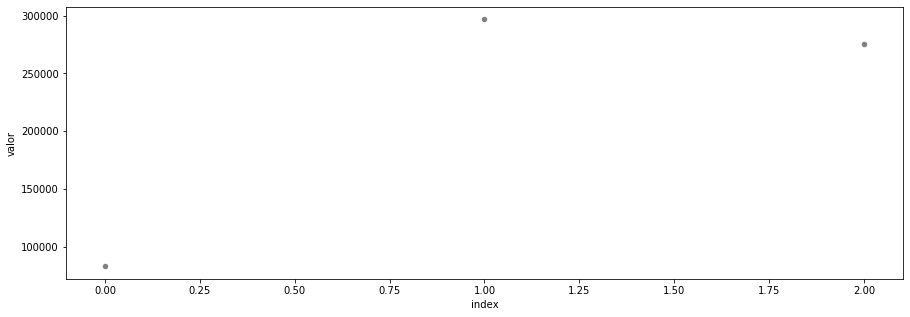

In [5]:
df_mes.plot(kind='scatter', x='index', y='valor', color='gray')

In [6]:
df_mes.tail()

,index,mes,ano,valor
0,0,8,2018,83050.67
1,1,9,2018,296706.28
2,2,10,2018,275052.14


In [7]:
# Dropando ultima linha do df

In [8]:
proxima_fatura_mes = df_mes['valor'].values[-1]
df_mes = df_mes.drop(df_mes.index[-1])

target_df_mes = [[proxima_fatura_mes]]

In [9]:
df_mes.tail()

,index,mes,ano,valor
0,0,8,2018,83050.67
1,1,9,2018,296706.28


In [10]:
# Test

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [12]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [13]:
X = pd.DataFrame(df_mes['index'])
y = pd.DataFrame(df_mes['valor'])

In [14]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [15]:
pred_df_mes = (model.predict([[2]]))

In [16]:
pred_df_mes

array([[510361.89]])

In [17]:
y_test = pred_df_mes
y_pred = target_df_mes
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  235309.75000000017
MSE 55370678445.062584
RMSE 235309.75000000017


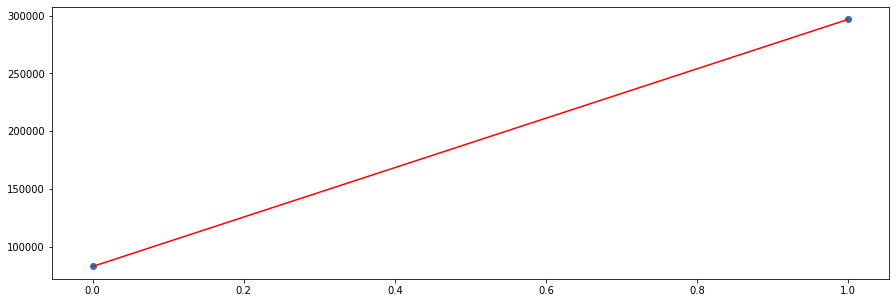

In [18]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [19]:
df_mes.corr()

,index,mes,ano,valor
index,1.0,1.0,NaN,1.0
mes,1.0,1.0,NaN,1.0
ano,NaN,NaN,NaN,NaN
valor,1.0,1.0,NaN,1.0


In [ ]:
# amostra pequena demais para se prever algo.